In [ ]:
import pandas as pd

In [ ]:
import wandb
api = wandb.Api()

names, configs, weighted_losses, f1_scores = [], [], [], []

In [ ]:
sweep_ids = ['bk150cyb', 's2x8fbyh', 'jlkrerit']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('baseline')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
sweep_ids = ['1c6j3n0a', '3bs0fyt0', 'r3bsxl7s']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('best6')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
sweep_ids = ['6ci28yvx', 'jsethu0i', 'czxa4tzd']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append('resnet34')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    weighted_losses.append(False)
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [ ]:
sweep_id = "xq185840"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("best6")
    weighted_losses.append(False)
    f1_scores.append(run.summary['f1_score'])

In [ ]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], weighted_losses[::-1], f1_scores[::-1])), columns=['config', 'name', 'weighting_strategy', 'f1_score'])
f1_df.tail()

,config,name,weighting_strategy,f1_score
85,baseline,rare-sweep-1,False,0.972910
86,baseline,earthy-sweep-2,False,0.971245
87,baseline,happy-sweep-3,False,0.980292
88,baseline,soft-sweep-4,False,0.979065
89,baseline,fluent-sweep-5,False,0.974682


In [ ]:
f1_df.loc[f1_df['weighting_strategy'] == False, 'weighting_strategy'] = "none"

In [ ]:
f1_df.to_csv('logs/07_compare_weighted.csv')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f1_df = pd.read_csv('logs/07_compare_weighted.csv')

In [ ]:
filt = (f1_df['config'] == 'baseline') & (f1_df['weighting_strategy'] == 'none')
f1_df.loc[filt].median(0)

/tmp/ipykernel_17168/1702217468.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f1_df.loc[filt].median(0)


Unnamed: 0    47.000000
f1_score       0.973796
dtype: float64

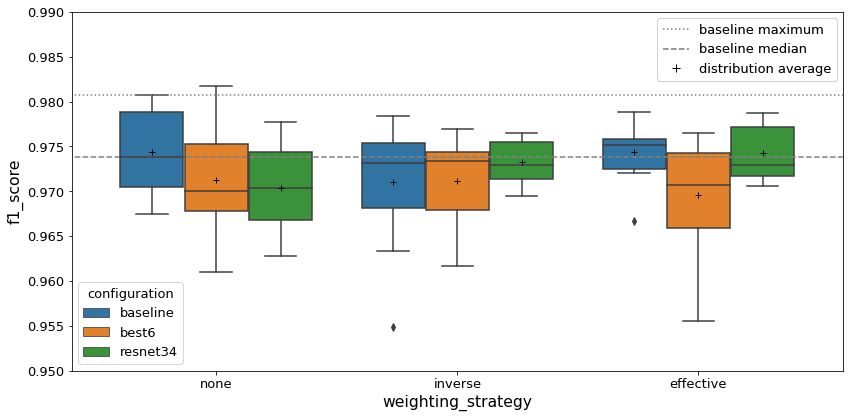

In [ ]:
plt.rc('font', size=13)

import matplotlib.lines as mlines

fig = plt.figure(figsize=(12, 6))
sns.boxplot(x='weighting_strategy', y='f1_score', hue='config', data=f1_df, 
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            hue_order=sorted(f1_df['config'].unique()), order=['none', 'inverse', 'effective'])
plt.xlim([-0.6, 2.6])
plt.ylim([0.95, 0.99])
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='large')
ax.set_xlabel("weighting_strategy", size='large')
#plt.xticks(fontsize='large')
leg1 = plt.legend(title='configuration', loc='lower left')
#ax.set_xticks([])

maximum = plt.hlines(0.980712, -0.75, 2.75, linestyles='dotted', color='grey', label='baseline maximum')
median = plt.hlines(0.973796, -0.75, 2.75, linestyles='dashed', color='grey', label='baseline median')
average = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=8, label='distribution average')
baseline_legend = ax.legend(handles=[maximum, median, average], loc='upper right')
ax.add_artist(baseline_legend)
ax.add_artist(leg1)

fig.tight_layout()

fig.savefig('../figs/glitches/07_compare_weighted_v2.pdf', dpi=600)

In [ ]:
paper_f1_df = f1_df.loc[f1_df['config']!='best6']

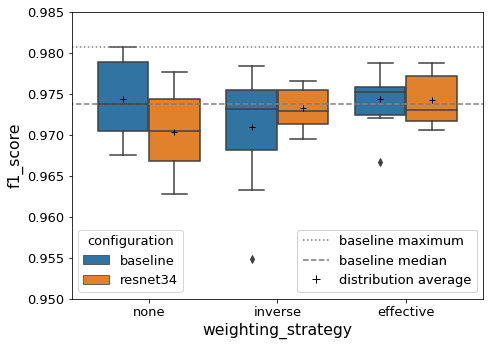

In [ ]:
plt.rc('font', size=13)

import matplotlib.lines as mlines

fig = plt.figure(figsize=(7, 5))
sns.boxplot(x='weighting_strategy', y='f1_score', hue='config', data=paper_f1_df, 
            showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            hue_order=sorted(paper_f1_df['config'].unique()), order=['none', 'inverse', 'effective'])
plt.xlim([-0.6, 2.6])
plt.ylim([0.95, 0.985])
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='large')
ax.set_xlabel("weighting_strategy", size='large')
#plt.xticks(fontsize='large')
leg1 = plt.legend(title='configuration', loc='lower left')
#ax.set_xticks([])

maximum = plt.hlines(0.980712, -0.75, 2.75, linestyles='dotted', color='grey', label='baseline maximum')
median = plt.hlines(0.973796, -0.75, 2.75, linestyles='dashed', color='grey', label='baseline median')
average = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=8, label='distribution average')
baseline_legend = ax.legend(handles=[maximum, median, average], loc='lower right')
ax.add_artist(baseline_legend)
ax.add_artist(leg1)

fig.tight_layout()

fig.savefig('../figs/glitches/07_compare_weighted_paper.pdf', dpi=600)

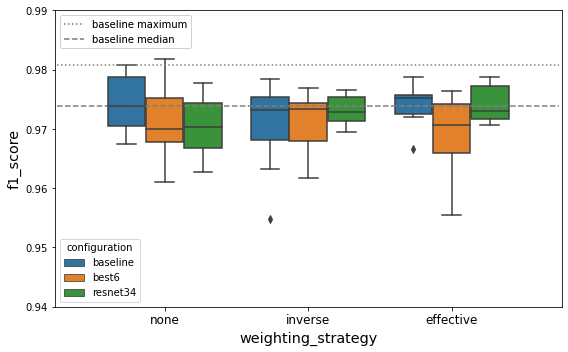

In [ ]:
import matplotlib.lines as mlines

fig = plt.figure(figsize=(8, 5))
sns.boxplot(x='weighting_strategy', y='f1_score', hue='config', data=f1_df, 
            #showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            hue_order=sorted(f1_df['config'].unique()), order=['none', 'inverse', 'effective'])
plt.ylim([0.94, 0.99])
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("weighting_strategy", size='x-large')
plt.xticks(fontsize='large')
leg1 = plt.legend(title='configuration', loc='lower left')
#ax.set_xticks([])

maximum = plt.hlines(0.980712, -0.75, 2.75, linestyles='dotted', color='grey', label='baseline maximum')
median = plt.hlines(0.973796, -0.75, 2.75, linestyles='dashed', color='grey', label='baseline median')
#average = mlines.Line2D([], [], color='black', marker='+', linestyle='None', markersize=10, label='average')
baseline_legend = ax.legend(handles=[maximum, median], loc='upper left')
ax.add_artist(baseline_legend)
ax.add_artist(leg1)

fig.tight_layout()

fig.savefig('../figs/glitches/07_compare_weighted.png', dpi=600)

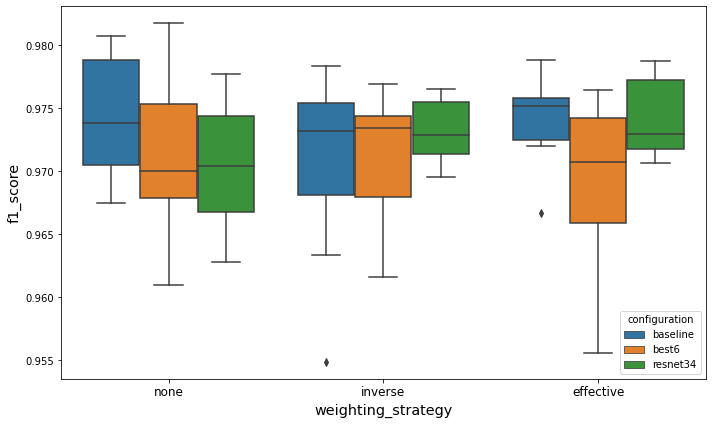

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='weighting_strategy', y='f1_score', hue='config', data=f1_df, hue_order=sorted(f1_df['config'].unique()), order=['none', 'inverse', 'effective'])
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("weighting_strategy", size='x-large')
plt.xticks(fontsize='large')
plt.legend(title='configuration', loc='lower right')
#ax.set_xticks([])
fig.tight_layout()

#fig.savefig('../figs/glitches/07_compare_weighted.png', dpi=300)